In [42]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import os 

# Data Cleaning process

In [3]:
# directory folder of the datasets 
DATA_DIR = 'D:\\Data Science\\A_NEWLY_HIRED_DATA_ANALYST (1)\\A_NEWLY_HIRED_DATA_ANALYST\\'

In [32]:
# reading the output template excel file 
out_temp_file = 'Data_Output_Template.xlsx'
out_temp = pd.read_excel(os.path.join(DATA_DIR,out_temp_file), parse_dates={'DATE':['SYEAR','SMTH']})
out_temp.head()

,DATE,LMO_Detailed_Industry,Employment
0,1997-01-01,Accommodation services,NaN
1,1997-01-01,Air transportation,NaN
2,1997-01-01,Ambulatory health care services,NaN
3,1997-01-01,"Amusement, gambling and recreation industries",NaN
4,1997-01-01,"Architectural, engineering and related services",NaN


In [6]:
#reading the LM0_Detailed industy csv file 
lmo_file = 'LMO_Detailed_Industries_by_NAICS.xlsx'
lmo = pd.read_excel(os.path.join(DATA_DIR, lmo_file))

# cleaning the lmo dataset 
lmo['NAICS'] = lmo['NAICS'].astype('str').str.replace('&','')
lmo['NAICS'] = lmo['NAICS'].str.strip()
lmo.head()

,LMO_Detailed_Industry,NAICS
0,Farms,111 112
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211


In [7]:
#reading each csv file, parsing dates and joining the paths 
def read_csv(file):
    ''' This function reads the csv files
    
        parse date into a datetime , and splits the 
        
        naics code from the industry names  '''
    
    r = pd.read_csv(file, parse_dates={'DATE':['SYEAR','SMTH']}) 
    
    r['NAICS'] = r['NAICS'].str.replace(']', '')
    r[['NAICS', 'CODE']] = r['NAICS'].str.split('[', n=1, expand=True)
    
    return r 
    

# 2-digit industries 

In [8]:
# 2 NAICS csv files 
file_00_05 = 'RTRA_Employ_2NAICS_00_05.csv'
file_06_10 = 'RTRA_Employ_2NAICS_06_10.csv'
file_11_15 = 'RTRA_Employ_2NAICS_11_15.csv'
file_16_20 = 'RTRA_Employ_2NAICS_16_20.csv'
file_97_99 = 'RTRA_Employ_2NAICS_97_99.csv'

In [9]:
file1 = read_csv(os.path.join(DATA_DIR, file_00_05))
file2 = read_csv(os.path.join(DATA_DIR, file_06_10))
file3 = read_csv(os.path.join(DATA_DIR, file_11_15))
file4 = read_csv(os.path.join(DATA_DIR, file_16_20))
file5 = read_csv(os.path.join(DATA_DIR, file_97_99))

<ipython-input-7-bb7694380001>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  r['NAICS'] = r['NAICS'].str.replace(']', '')


In [10]:
#concatenating all the two_digit data
two_digit = pd.concat([file1, file2, file3, file4, file5])
two_digit = two_digit[two_digit['DATE'] < '2019-01-01']

In [11]:
#column of interest is NAICS CODE, DATE AND _EMPLOYMENT_, dropping any other columns 
two_digit = two_digit.drop('NAICS', axis=1)
#re assigning the NAICS NAME 
two_digit = two_digit.rename(columns={'CODE': 'NAICS'})
two_digit.head()

,DATE,_EMPLOYMENT_,NAICS
0,2000-01-01,148000,72
1,2000-01-01,59250,56
2,2000-01-01,61750,11
3,2000-01-01,39500,71
4,2000-01-01,106250,23


In [12]:
# merging the two digit with lmo on the naics column
data_2 = lmo.merge(two_digit, on='NAICS', how='right').reset_index(drop=True)
data_2.head()


,LMO_Detailed_Industry,NAICS,DATE,_EMPLOYMENT_
0,NaN,72,2000-01-01,148000
1,NaN,56,2000-01-01,59250
2,NaN,11,2000-01-01,61750
3,NaN,71,2000-01-01,39500
4,Construction,23,2000-01-01,106250


# 3-digit industries 

In [13]:
# 3-digit industry files 
file3_00_05 = 'RTRA_Employ_3NAICS_00_05.csv'
file3_06_10 = 'RTRA_Employ_3NAICS_06_10.csv'
file3_11_15 = 'RTRA_Employ_3NAICS_11_15.csv'
file3_16_20 = 'RTRA_Employ_3NAICS_16_20.csv'
file3_97_99 = 'RTRA_Employ_3NAICS_97_99.csv'

In [14]:
file3_1 = read_csv(os.path.join(DATA_DIR, file3_00_05))
file3_2 = read_csv(os.path.join(DATA_DIR, file3_06_10))
file3_3 = read_csv(os.path.join(DATA_DIR, file3_11_15))
file3_4 = read_csv(os.path.join(DATA_DIR, file3_16_20))
file3_5 = read_csv(os.path.join(DATA_DIR, file3_97_99))

<ipython-input-7-bb7694380001>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  r['NAICS'] = r['NAICS'].str.replace(']', '')


In [15]:
# concatenating all the three digit industries and selecting the date of interest
three_digit = pd.concat([file3_1, file3_2, file3_3, file3_4, file3_5])
three_digit = three_digit[three_digit['DATE'] < '2019-01-01']

In [16]:
#column of interest is NAICS CODE, DATE AND _EMPLOYMENT_, dropping any other columns 
three_digit = three_digit.drop('NAICS', axis=1)
#re assigning the NAICS NAME 
three_digit = three_digit.rename(columns={'CODE': 'NAICS'})
three_digit.head()

,DATE,_EMPLOYMENT_,NAICS
0,2000-01-01,500,914
1,2000-01-01,33750,721
2,2000-01-01,55250,561
3,2000-01-01,17500,481
4,2000-01-01,53000,621


In [17]:
# merging the three digit industry with lmo on the naics column
data_3 = lmo.merge(three_digit, on='NAICS', how='right').reset_index(drop=True)
data_3.head()

,LMO_Detailed_Industry,NAICS,DATE,_EMPLOYMENT_
0,NaN,914,2000-01-01,500
1,Accommodation services,721,2000-01-01,33750
2,NaN,561,2000-01-01,55250
3,Air transportation,481,2000-01-01,17500
4,Ambulatory health care services,621,2000-01-01,53000


# 4-digit industries

In [18]:
# 4-digit industry files 
file4_00_05 = 'RTRA_Employ_4NAICS_00_05.csv'
file4_06_10 = 'RTRA_Employ_4NAICS_06_10.csv'
file4_11_15 = 'RTRA_Employ_4NAICS_11_15.csv'
file4_16_20 = 'RTRA_Employ_4NAICS_16_20.csv'
file4_97_99 = 'RTRA_Employ_4NAICS_97_99.csv'

In [19]:
# reading the files 
file4_1 = pd.read_csv(os.path.join(DATA_DIR, file4_00_05), parse_dates={'DATE':['SYEAR','SMTH']})
file4_2 = pd.read_csv(os.path.join(DATA_DIR, file4_06_10), parse_dates={'DATE':['SYEAR','SMTH']})
file4_3 = pd.read_csv(os.path.join(DATA_DIR, file4_11_15), parse_dates={'DATE':['SYEAR','SMTH']})
file4_4 = pd.read_csv(os.path.join(DATA_DIR, file4_16_20), parse_dates={'DATE':['SYEAR','SMTH']})
file4_5 = pd.read_csv(os.path.join(DATA_DIR, file4_97_99), parse_dates={'DATE':['SYEAR','SMTH']})

In [29]:
# concatenating all the files and parsing the dates 

four_digit = pd.concat([file4_1, file4_2, file4_3, file4_4, file4_5])
four_digit = four_digit[four_digit['DATE'] < '2019-01-01']

In [30]:
four_digit['NAICS'] = four_digit['NAICS'].astype('str')

In [31]:
# merging the four digit industry with lmo on the naics column
data_4 = lmo.merge(four_digit, on='NAICS', how='right').reset_index(drop=True)
data_4.head()

,LMO_Detailed_Industry,NAICS,DATE,_EMPLOYMENT_
0,NaN,1100,2000-01-01,500
1,NaN,1111,2000-01-01,0
2,NaN,1112,2000-01-01,2000
3,NaN,1113,2000-01-01,250
4,NaN,1114,2000-01-01,7750


# Adding all the industries 

In [23]:
industries = pd.concat([data_2, data_3, data_4], ignore_index=True)

In [24]:
industries.head()

,LMO_Detailed_Industry,NAICS,DATE,_EMPLOYMENT_
0,NaN,72,2000-01-01,148000
1,NaN,56,2000-01-01,59250
2,NaN,11,2000-01-01,61750
3,NaN,71,2000-01-01,39500
4,Construction,23,2000-01-01,106250


In [25]:
industries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117744 entries, 0 to 117743
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   LMO_Detailed_Industry  12228 non-null   object        
 1   NAICS                  117216 non-null  object        
 2   DATE                   117744 non-null  datetime64[ns]
 3   _EMPLOYMENT_           117744 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.6+ MB


In [26]:
industries = industries.dropna()

In [27]:
# dropping the NAICS column 
industries = industries.drop('NAICS', axis=1)

In [28]:
industries.head()

,LMO_Detailed_Industry,DATE,_EMPLOYMENT_
4,Construction,2000-01-01,106250
12,"Repair, personal and non-profit services",2000-01-01,100250
15,Real estate rental and leasing,2000-01-01,37500
18,Utilities,2000-01-01,10750
19,Wholesale trade,2000-01-01,69500


In [33]:
industries = industries.drop_duplicates(subset=['DATE','LMO_Detailed_Industry'], ignore_index=True)

In [35]:
# sorting the values 
industries = industries[['DATE','LMO_Detailed_Industry','_EMPLOYMENT_']].sort_values(by=['DATE','LMO_Detailed_Industry'])
industries.head()

,DATE,LMO_Detailed_Industry,_EMPLOYMENT_
9072,1997-01-01,Accommodation services,24000
9073,1997-01-01,Air transportation,17000
9074,1997-01-01,Ambulatory health care services,40000
9075,1997-01-01,"Amusement, gambling and recreation industries",20000
11977,1997-01-01,"Architectural, engineering and related services",27000


# Merging the output template with the industries 

In [37]:
output_industries = pd.merge(out_temp, industries, on=['DATE', 'LMO_Detailed_Industry'], how='left')
output_industries.head()

,DATE,LMO_Detailed_Industry,Employment,_EMPLOYMENT_
0,1997-01-01,Accommodation services,NaN,24000.0
1,1997-01-01,Air transportation,NaN,17000.0
2,1997-01-01,Ambulatory health care services,NaN,40000.0
3,1997-01-01,"Amusement, gambling and recreation industries",NaN,20000.0
4,1997-01-01,"Architectural, engineering and related services",NaN,27000.0


In [38]:
# we need to assign the appropriate column thus EMPLOYMENT
output_industries['Employment'] = output_industries['_EMPLOYMENT_']

# this drops the _EMPLOYMENT_ as we don't need it anymore 
output_industries = output_industries.drop('_EMPLOYMENT_', axis=1)

# since it's a time series analysis, we need to set the date as the dataframe index 
output_industries = output_industries.set_index('DATE')
output_industries.head()

,LMO_Detailed_Industry,Employment
DATE,,
1997-01-01,Accommodation services,24000.0
1997-01-01,Air transportation,17000.0
1997-01-01,Ambulatory health care services,40000.0
1997-01-01,"Amusement, gambling and recreation industries",20000.0
1997-01-01,"Architectural, engineering and related services",27000.0


In [39]:
output_industries.tail()

,LMO_Detailed_Industry,Employment
DATE,,
2018-12-01,Utilities,12250.0
2018-12-01,Warehousing and storage,8750.0
2018-12-01,Water transportation,5000.0
2018-12-01,Wholesale trade,91500.0
2018-12-01,Wood product manufacturing,23750.0


In [40]:
output_industries.shape

(15576, 2)

# Analysing the data 

Let's visualize each employment for each sector 

In [96]:
output_industries.head()

,LMO_Detailed_Industry,Employment
DATE,,
1997-01-01,Accommodation services,24000.0
1997-01-01,Air transportation,17000.0
1997-01-01,Ambulatory health care services,40000.0
1997-01-01,"Amusement, gambling and recreation industries",20000.0
1997-01-01,"Architectural, engineering and related services",27000.0


In [90]:
output_industries = output_industries.dropna()

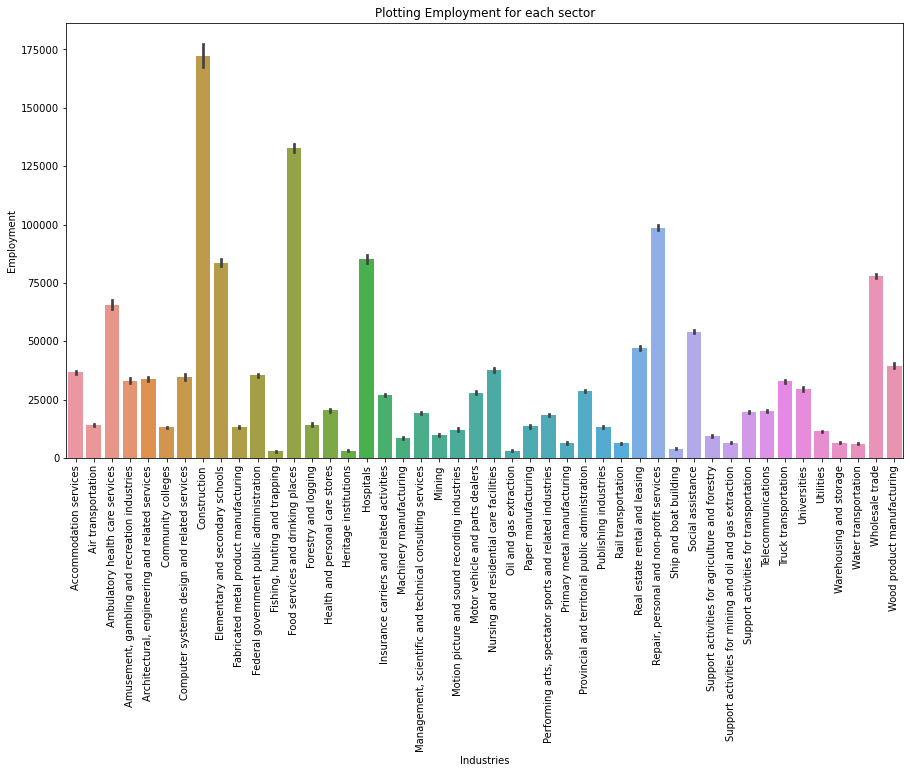

In [110]:
plt.figure(figsize=(15,8))
sns.barplot(x='LMO_Detailed_Industry', y='Employment', data=output_industries)
plt.xlabel('Industries')
plt.ylabel('Employment')
plt.title('Plotting Employment for each sector')
plt.xticks(rotation=90)
plt.show()

We can see that, construction has the highest number of employment rate, 
now let's answer our first question 

1. How has employment in Construction evolved over time 

In [74]:
construction = output_industries[output_industries['LMO_Detailed_Industry'] == 'Construction']

In [80]:
construction

,LMO_Detailed_Industry,Employment
DATE,,
1997-01-01,Construction,118000.0
1997-02-01,Construction,120000.0
1997-03-01,Construction,116750.0
1997-04-01,Construction,125500.0
1997-05-01,Construction,123750.0
...,...,...
2018-08-01,Construction,239500.0
2018-09-01,Construction,238750.0
2018-10-01,Construction,232750.0


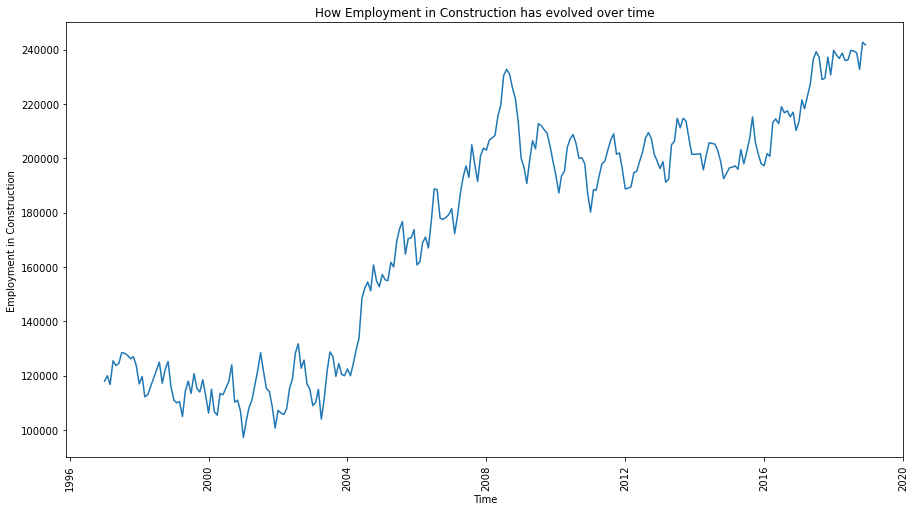

In [82]:
plt.figure(figsize=(15,8))
sns.lineplot(x=construction.index, y='Employment', data=construction)
plt.xlabel('Time')
plt.ylabel('Employment in Construction')
plt.title('How Employment in Construction has evolved over time')
plt.xticks(rotation=90)
plt.show()

From the graph above, we can see that employment in construction had a peak from the years 2008-2010, it experienced 
a subtle decline for nearly a decade and went back up 
It tells us that Employment in Construction increased over the years 

Our second question is, comparing this to other employment across industries, how was the variation 

In [83]:
not_construction = output_industries[output_industries['LMO_Detailed_Industry'] != 'Construction']

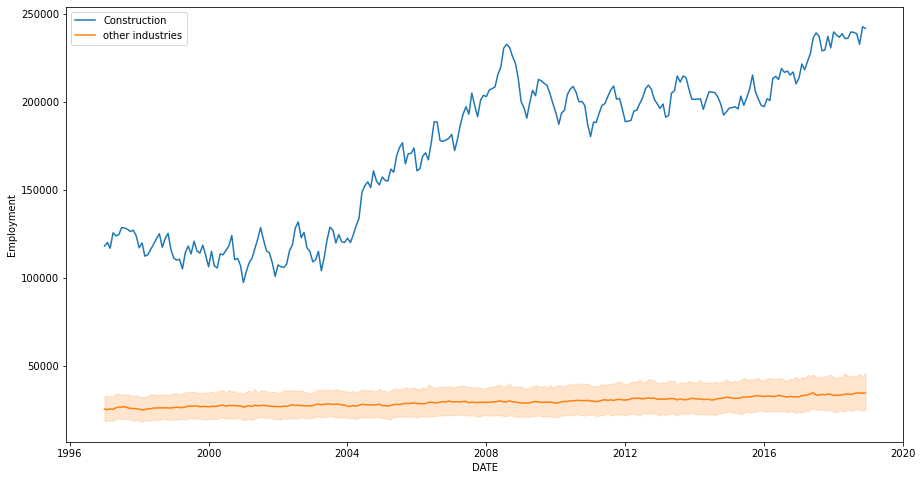

In [89]:
plt.figure(figsize=(15,8))
sns.lineplot(x=construction.index, y='Employment', data=construction, label='Construction')
sns.lineplot(x=not_construction.index, y='Employment', data=not_construction, label='other industries')
plt.show()

We see that, employment in construction was really high compared to other employment across industries 

Let's turn out attention to Employment in the Hospital sector, 
How did it evolved over time, and also comparing to other sectors 

In [112]:
Hospital = output_industries[output_industries['LMO_Detailed_Industry'] == 'Hospitals']


,LMO_Detailed_Industry,Employment
DATE,,
1997-01-01,Hospitals,62000.0
1997-02-01,Hospitals,61750.0
1997-03-01,Hospitals,62250.0
1997-04-01,Hospitals,68000.0
1997-05-01,Hospitals,71000.0
...,...,...
2018-08-01,Hospitals,103000.0
2018-09-01,Hospitals,107750.0
2018-10-01,Hospitals,104500.0


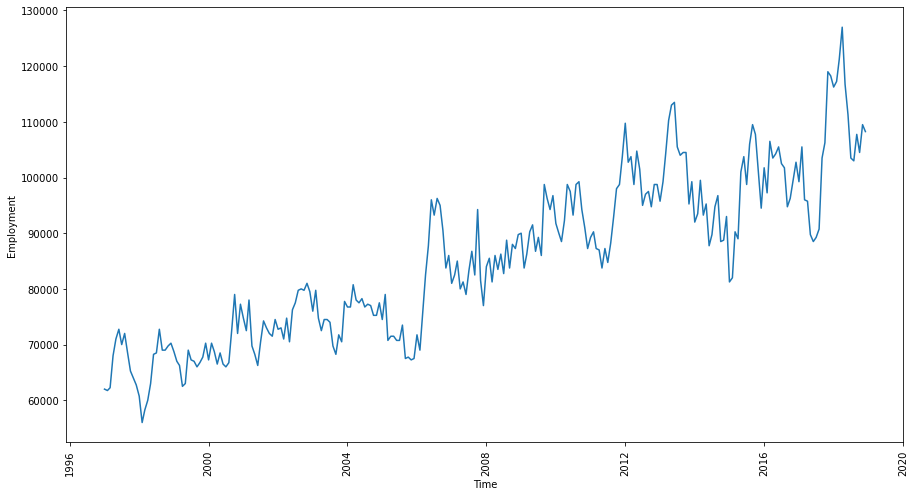

In [114]:
plt.figure(figsize=(15,8))
sns.lineplot(x=Hospital.index, y=Hospital.Employment, data = Hospital)
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Employment')
plt.show()

We can see that there is variation of employment in the hospital sector across the year's,
overall the employment rate in the hospital sector rallied up.


Let us look at how the Hospital sector evolved in relation to other sector in the industries 

In [115]:
not_Hospital = output_industries[output_industries['LMO_Detailed_Industry'] != 'Hospitals']

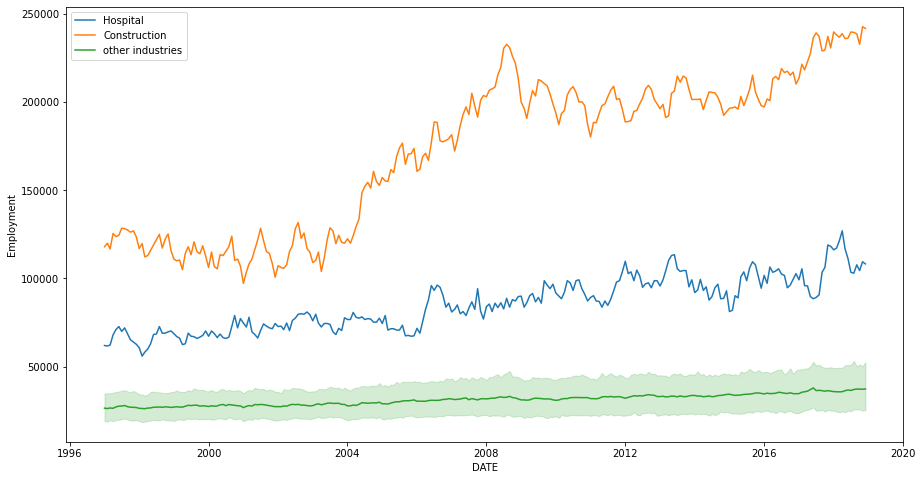

In [117]:
plt.figure(figsize=(15,8))
sns.lineplot(x=Hospital.index, y=Hospital.Employment, data=Hospital, label='Hospital')
sns.lineplot(x=construction.index, y='Employment', data=construction, label='Construction')
sns.lineplot(x=not_Hospital.index, y='Employment', data=not_Hospital, label='other industries')
plt.show()

From the graph, whiles the Employment rate of the Hospital industry did increase over time gradually

the employment rate in the Hospital industry experienced a subtle increase over the years.